In [29]:
import numpy as np
from matplotlib import pyplot as plt

# Determines verticle velocity eqn of the plinko
def velocityY():
    return -9.81*100

#def psn(initial, velocityY, velocityX):

# Function the create peg Locations
def InitializePegs(y, pegs, spacing, boardHeight, boardWidth):
    pegHeight, pegWidth = pegs.shape
    # Offset must be spacing/2 or else distance between the pegs will not be evenly spaced
    offset = spacing/2
    # Initialize distance between the points
    width1 = np.arange(offset, boardWidth + spacing, spacing)
    # If the position of the pegs surpass the board, set the position to None
    for i in range(0, np.size(width1)):
        if (width1[i] > boardWidth):
            width1[i] = None
    # Set second width results
    width2 = np.arange(0, boardWidth + spacing, spacing)
    # Tried to use boolean method to alternate between which width but didn't work properly
    # May need to change for later
    alternate = 1;
    heightSpace = spacing * np.cos(30 * (np.pi/180))
    height = 0
    # Sets both the x and y positions for the pegs
    for i in range(0, pegHeight):
        for j in range(0, pegWidth):
            if (alternate % 2 != 0):
                pegs[i][j] = width1[j]
            else:
                pegs[i][j] = width2[j]
            y[i][j] = height
        alternate += 1
        height += heightSpace
    return y, pegs
    
# Draw Game Board
def drawBoard(height, width, spacing, numOfPegsInRows, numOfPegRows):
    boardHeight = height - 10
    # Determines the size of the board
    # Creating pegs
    pegsX = np.zeros((numOfPegsInRows + 1) * numOfPegRows).reshape(numOfPegRows, numOfPegsInRows + 1)
    pegsY = np.copy(pegsX)
    pegsY, pegsX = InitializePegs(pegsY, pegsX, spacing, boardHeight, width)
    # Finding Positions of pegs
    plt.plot(pegsX, pegsY, "o", c='black')
    return pegsX, pegsY
    




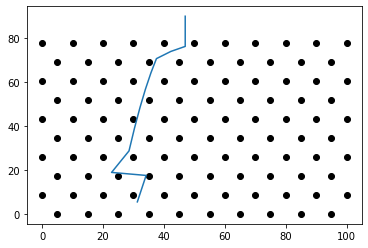

In [113]:
def velocityY():
    return -981

# Function to move Plinko
def movePlinko(posX, posY, vX, vY, timeStep):
    vY += velocityY()
    posY += vY * timeStep
    posX += vX * timeStep
    return posX, posY, vX, vY

# helper function to determine the angle between 
def findTheta(pegX, pegY, plinkoX, plinkoY):
    rise = plinkoY - pegY
    run = plinkoX - pegX
    # Pretty sure this shouldn't be in degrees but the collision gets wonky when in radians
    # Decided to keep it if it turns out this is right
    theta = np.arctan(rise/run) * 180/np.pi
    return theta
    

# Determines location of plinko collision and returns the angle of the collision
# Returns None if no collision is detected
# TODO: Collision detection does not work 100% of the time, needs to be tweaked
def detectCollision(pegDiam, plinkoDiam, plinkoX, plinkoY, pegsX, pegsY):
    # Simplistic method: Loop through every peg location checking if there is a collision
    # Would be O(N**2) so not preferable
    # More complicated: Determine y level of plinko and target specific quadrants of the pegs
    pegHeight, pegWidth = np.shape(pegsY)
    # Determine error
    plinkoRadius = plinkoDiam/2
    pegRadius = pegDiam/2
    error = plinkoRadius + pegRadius
    # Determine the collision on the y level
    yLoc = None
    for i in range(0, pegHeight):
        if ( pegsY[i][0] - error <= plinkoY <= pegsY[i][0] + error):
            yLoc = i
    if (yLoc == None):
        return None
    # Determine the collision on the x level
    xLoc = None
    for j in range(0, pegWidth):
        if(pegsX[yLoc][j] - error <= plinkoX <= pegsX[yLoc][j] + error):
            xLoc = j
    # If no x collision is found return None, None
    if(xLoc == None):
        return None
    theta = findTheta(pegsX[yLoc][xLoc], pegsY[yLoc][xLoc], plinkoX, plinkoY)
    return theta
    

# Updates collision velocity
# TODO: Use own code from Lab 4 to solve the equation
def collisionVelocity(xIn, yIn, theta):
    array1 = np.array([[np.cos(2*theta), np.sin(2*theta)], [np.sin(2*theta), -np.cos(2*theta)]])
    array2 = np.array([xIn, yIn])
    return np.linalg.solve(array1, array2)
    

# Test function to simulate the movement of the plinko
# While somewhat works has an issue where it won't detect a peg if the time step is too large
# TODO: Add all necessary arguments
def PlinkoTest():
    # Define variable for the x and y position of the plinko which will store
    plinkoY = None
    plinkoX = None
    # Draws the board and gets the values for pegsX and pegsY
    pegsX, pegsY = drawBoard(90, 100, 10, 10, 10)
    # Defines the starting position of the Plinko
    plinkoPosY = 90
    plinkoPosX = 47
    # Iterator for the loop
    vY = velocityY()
    vX = 0
    while(plinkoPosY > 0):
        # Checks if there is a collision and updates velocities accordingly
        plinkoY = np.append(plinkoY, plinkoPosY)
        plinkoX = np.append(plinkoX, plinkoPosX)
        theta = detectCollision(1, 5, plinkoPosX, plinkoPosY, pegsX, pegsY)
        if (theta != None):
            vX, vY = collisionVelocity(vX, vY, theta)
        plinkoPosX, plinkoPosY, vX, vY = movePlinko(plinkoPosX, plinkoPosY, vX, vY, 0.001)
    plt.plot(plinkoX, plinkoY)
PlinkoTest()
    
    